# Descriptive Statistics 

### Question 1
Summarise your dataset clearly, using relevant descriptive statistics and appropriate plots. These should be carefully motivated and justified, and clearly presented. You should critically analyse your findings, in addition to including the necessary Python code, output and plots in the report. You are required to plot at least three graphs. [0-35]

In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
df_all_data = pd.read_excel(r"C:\Users\stphn\Documents\CCT\Assessment\PEA25_estimated_population.xlsx", sheet_name="Unpivoted")

In [3]:
df_all_data.head()

,Statistic Label,Year,Sex,Citizenship,UNIT,VALUE
0,Estimated Population,2006,Both sexes,All Countries,Thousand,4232.9
1,Estimated Population,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,43.8
2,Estimated Population,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,Thousand,132.5
3,Estimated Population,2006,Both sexes,United Kingdom,Thousand,115.5
4,Estimated Population,2006,Both sexes,Ireland,Thousand,3802.4


In [4]:
df_all_data.describe()

,Year,VALUE
count,324.000000,324.000000
mean,2014.500000,1052.622531
std,5.196152,1492.635331
min,2006.000000,21.300000
25%,2010.000000,58.975000
50%,2014.500000,121.350000
75%,2019.000000,2145.400000
max,2023.000000,5281.600000


In [5]:
df_all_data.Year.value_counts()

2006    18
2007    18
2022    18
2021    18
2020    18
2019    18
2018    18
2017    18
2016    18
2015    18
2014    18
2013    18
2012    18
2011    18
2010    18
2009    18
2008    18
2023    18
Name: Year, dtype: int64

In [6]:
#We count the values
year_counts = df_all_data['Year'].value_counts()
relative_frequencies = year_counts / len(df_all_data)

In [7]:
#We create the subtable to find the relative frequency
subtable = pd.DataFrame({'State': year_counts.index, 
                         'Frequency': year_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

,State,Frequency,Relative Frequency
0,2006,18,0.055556
1,2007,18,0.055556
2,2022,18,0.055556
3,2021,18,0.055556
4,2020,18,0.055556
5,2019,18,0.055556
6,2018,18,0.055556
7,2017,18,0.055556
8,2016,18,0.055556
9,2015,18,0.055556


In [8]:
mean_value_col = df_all_data['VALUE'].mean()
print(mean_value_col)

1052.6225308641976


In [9]:
median_value_col = df_all_data['VALUE'].median()
print(median_value_col)

121.35


In [10]:
mode = df_all_data['VALUE'].mode()
print(mode)

0    115.5
Name: VALUE, dtype: float64


In [11]:
df_all_data['VALUE']

0      4232.9
1        43.8
2       132.5
3       115.5
4      3802.4
        ...  
319      50.0
320     122.6
321      40.5
322    2287.5
323     174.7
Name: VALUE, Length: 324, dtype: float64

[Text(0.5, 0, 'Population'),
 Text(0, 0.5, 'Num of cells with a value in this range'),
 Text(0.5, 1.0, 'Population Values Histogram')]

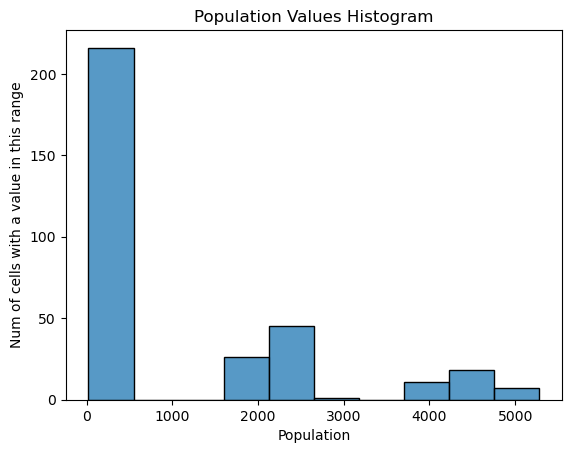

In [12]:
ax = sns.histplot(df_all_data.VALUE)
ax.set(xlabel='Population', ylabel='Num of cells with a value in this range', title ='Population Values Histogram')

[Text(0.5, 0, 'Population'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Population Values Histogram')]

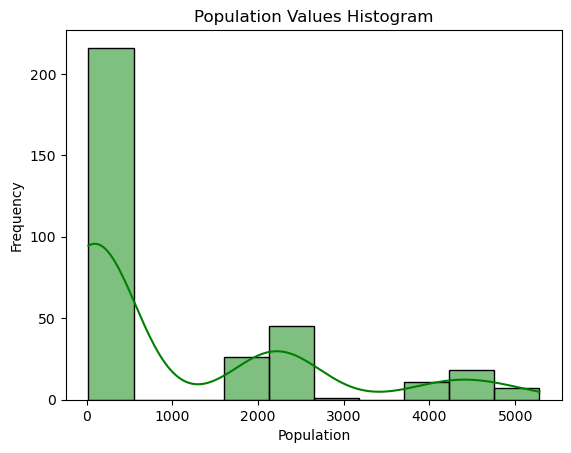

In [13]:
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram.
ax = sns.histplot(df_all_data.VALUE, kde=True, color ='green')
ax.set(xlabel='Population', ylabel='Num of cells with a value in this range', title ='Population Values Histogram')

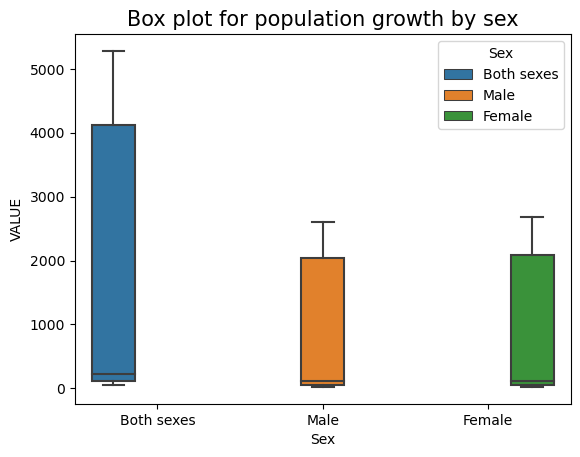

In [14]:
sns.boxplot(x = 'Sex', y ='VALUE', data=df_all_data, hue = 'Sex')
plt.title('Box plot for population growth by sex', fontsize=15)
#plt.legend([], [], frameon=False)
plt.show()

In [15]:
total_pop_by_category = df_all_data.drop(["Year", "Statistic Label", "Citizenship", "UNIT"], axis=1)
total_pop_by_category = total_pop_by_category.groupby('Sex', axis = 0).sum()
total_pop_by_category

,VALUE
Sex,
Both sexes,170524.9
Female,85940.5
Male,84584.3


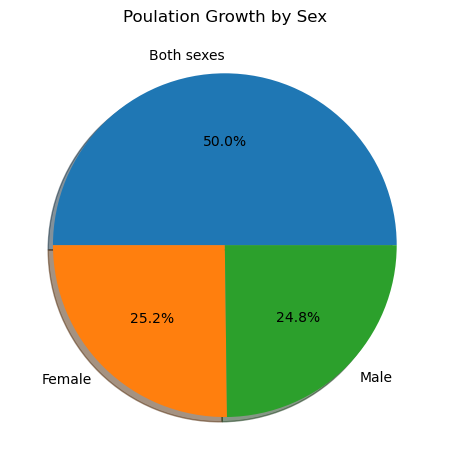

In [16]:
Sex = ['Both sexes', 'Female', 'Male']
total_pop_by_category['VALUE'].plot(kind='pie', labels = Sex, radius=1, autopct='%1.1f%%', shadow = True)
plt.title('Poulation Growth by Sex')
plt.ylabel("")
plt.tight_layout()

In [17]:
total_pop_by_category

,VALUE
Sex,
Both sexes,170524.9
Female,85940.5
Male,84584.3


In [18]:
total_pop_by_category.reset_index(inplace=True)
total_pop_by_category

,Sex,VALUE
0,Both sexes,170524.9
1,Female,85940.5
2,Male,84584.3


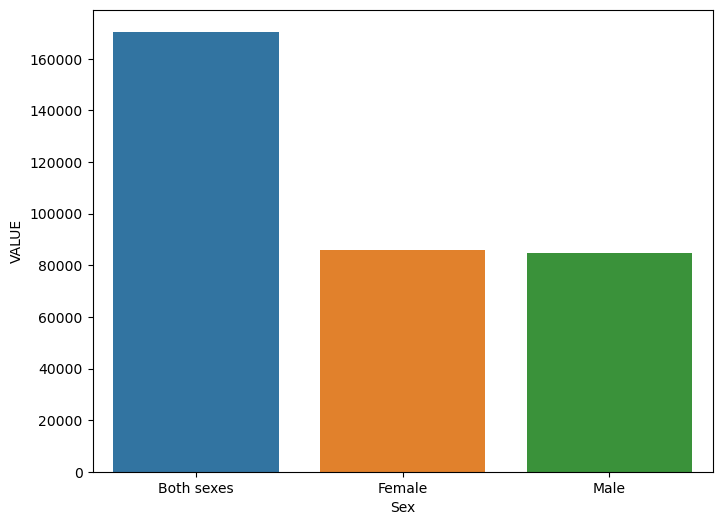

In [19]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Sex", y="VALUE", data=total_pop_by_category)

### Question 2

Use two discrete distributions (Binomial and/or Poisson) in order to explain/identify some information about your dataset. You must explain your reasoning and the techniques you have used. Visualise your data and explain what happens with the large samples in these cases. You must work with Python and your mathematical reasoning must be documented in your report. [0-30]

### Binomial Distribution

In [21]:
!pip install matplotlib
!pip install scipy

In [66]:
total_pop_both_sexs_2023 = df_all_data[((df_all_data['Sex'] == "Both sexes") & (df_all_data['Citizenship'] == "All Countries") & (df_all_data['Year'] == 2023))]
total_pop_both_sexs_2023 = total_pop_both_sexs_2023['VALUE']  # returns total population for both sexs in all countries for 2023
total_pop_both_sexs_2023 # 5281.6 total population for both sexs in 2023
total_pop_both_sexs_2023 = int(total_pop_both_sexs_2023) # Convert returned value to an int
#total_pop_both_sexs_2023

total_pop_female_2023 = df_all_data[((df_all_data['Sex'] == "Female") & (df_all_data['Citizenship'] == "All Countries") & (df_all_data['Year'] == 2023))]
total_pop_female_2023 = total_pop_female_2023['VALUE']  # returns total female population in all countries for 2023
total_pop_female_2023 # 2675.4 total female population for 2023
total_pop_female_2023 = int(total_pop_female_2023) # Convert returned value to an int
#total_pop_female_2023

probability_of_female = total_pop_female_2023 / total_pop_both_sexs_2023
#probability_of_female # 0.506551045137837


# The PMF is a probability measure that gives us probabilities of the possible values for a random variable.
result = binom.pmf(k = 3, n= 10, p = probability_of_female)
print("Probability of 3 out of 10 random people being female " + str(round(result,2)) + "%")

Probability of 3 out of 10 random people being female 0.11%


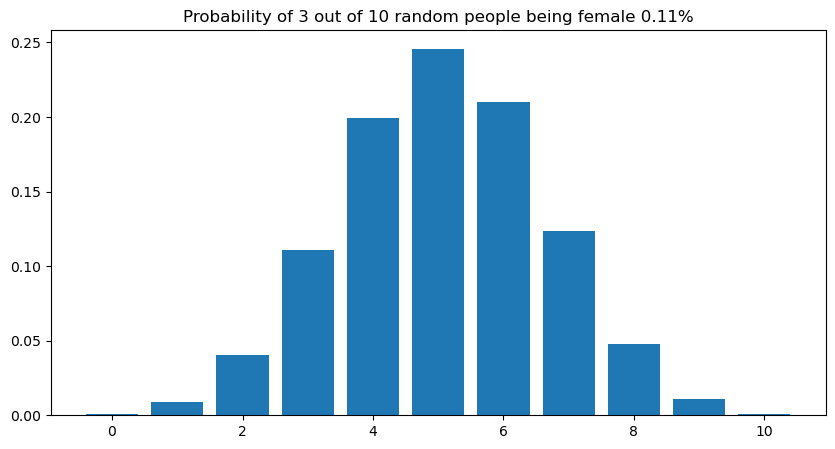

In [95]:
# setting the values of n and p 
n = 10
p = probability_of_female
# defining list of r values 
r_values = list(range(n + 1)) 
# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 
# plotting the graph  
plt.figure(figsize=(10,5))
plt.bar(r_values, dist) 
plt.title("Probability of 3 out of 10 random people being female 0.11%")
plt.show()

In [68]:
# The binomial cumulative distribution function lets you obtain the probability of observing less than or equal to x 
# successes in n trials, with the probability p of success on a single trial.
result = binom.cdf(k = 2, n= 10, p = probability_of_female)
print("Probability of less then 3 out of 10 random people being female " + str(round(result,2)) + "%")

Probability of less then 3 out of 10 random people being female 0.05%


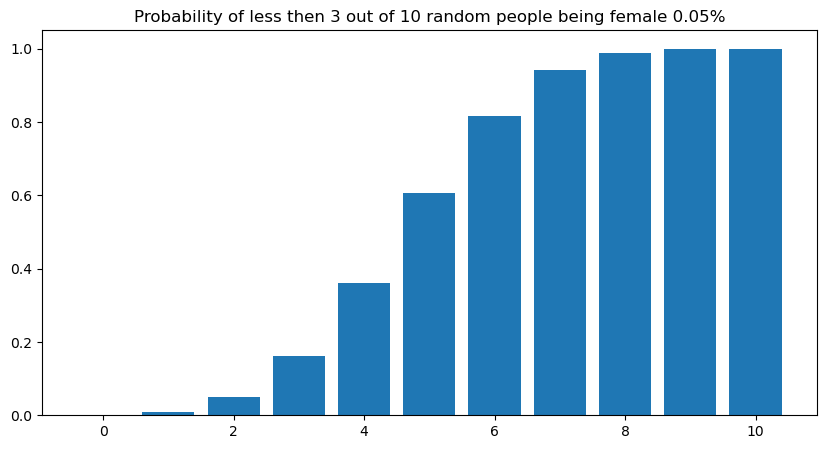

In [87]:
# setting the values of n and p 
n = 10
p = probability_of_female
r = 2
# defining list of r values
r_values = list(range(n + 1)) 
# list of pmf values 
dist = [binom.cdf(r, n, p) for r in r_values ] 
# plotting the graph  
plt.figure(figsize=(10,5))
plt.bar(r_values, dist) 
plt.title("Probability of less then 3 out of 10 random people being female 0.05%")
plt.show()

In [69]:
# The binomial cumulative distribution function lets you obtain the probability of observing less than or equal to x 
# successes in n trials, with the probability p of success on a single trial.
result = binom.cdf(k = 3, n= 10, p = probability_of_female)
print("Probability of 3 or less people out of 10 random people being female " + str(round(result,2)) + "%")

Probability of 3 or less people out of 10 random people being female 0.16%


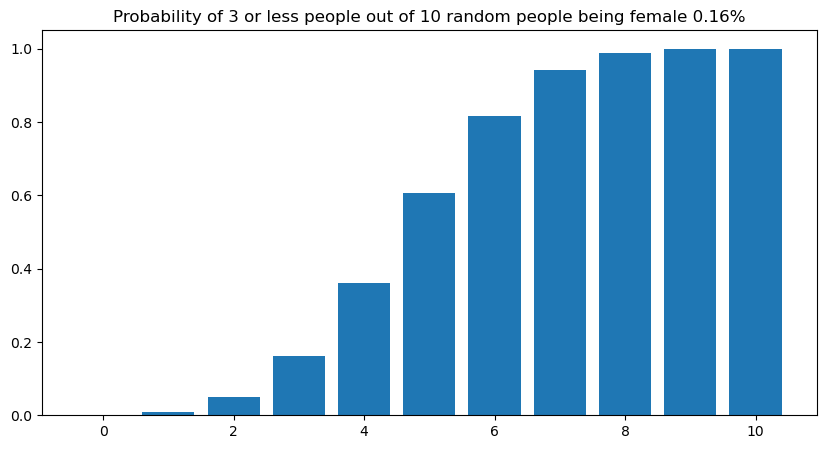

In [92]:
# setting the values of n and p 
n = 10
p = probability_of_female
r = 3
# defining list of r values
r_values = list(range(n + 1)) 
# list of pmf values 
dist = [binom.cdf(r, n, p) for r in r_values ] 
# plotting the graph  
plt.figure(figsize=(10,5))
plt.bar(r_values, dist) 
plt.title("Probability of 3 or less people out of 10 random people being female 0.16%")
plt.show()

In [74]:
# calculates the probability of having more than k out of n iterations
result = binom.sf(k = 3, n = 10, p = probability_of_female)
print("Probability of more then 3 out of 10 random people being female " + str(round(result,2)) + "%")

Probability of more then 3 out of 10 random people being female 0.84%


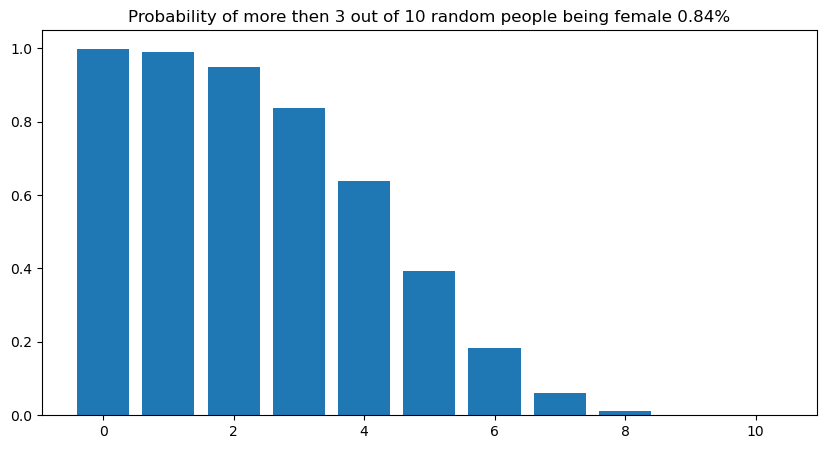

In [90]:
# setting the values of n and p 
n = 10
p = probability_of_female
# defining list of r values
r_values = list(range(n + 1)) 
# list of pmf values 
dist = [binom.sf(r, n, p) for r in r_values ] 
# plotting the graph  
plt.figure(figsize=(10,5))
plt.bar(r_values, dist) 
plt.title("Probability of more then 3 out of 10 random people being female 0.84%")
plt.show()

### Poisson distribution

### Question 3

Use Normal distribution to explain or identify some information about your dataset. 

### Question 4

Explain the importance of the distributions used in point 3 and 4 in your analysis. Justify the choice of the variables and explain if the variables used for the discrete distributions could be used as normal distribution in this case. [0-15]